Data Collection and Preprocessing

The data collected is related to COVID 19 Data from the year 2020 to 2023. It is publicly available on the WHO website at https://covid19.who.int/data.

In [1]:
! pip install pandas

In [2]:
# Step 1: Import necessary libraries
import pandas as pd

In [3]:
data = pd.read_csv("COVID-2020-2021-2022-USA.csv")

In [4]:
# Step 3: Display the first few rows of the dataset to inspect its structure
print(data.head())

  Date_reported Country_code                   Country WHO_region  New_cases  \
0    03-01-2020           US  United States of America       AMRO          0   
1    04-01-2020           US  United States of America       AMRO          0   
2    05-01-2020           US  United States of America       AMRO          0   
3    06-01-2020           US  United States of America       AMRO          0   
4    07-01-2020           US  United States of America       AMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0                 0           0                  0  
1                 0           0                  0  
2                 0           0                  0  
3                 0           0                  0  
4                 0           0                  0  


In [118]:
data.shape

(1094, 8)

In [5]:
# Step 4: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


In [6]:
# Step 5: Remove duplicates if any
data.drop_duplicates(inplace=True)

In [7]:
data['Date_reported'] = pd.to_datetime(data['Date_reported'], format='%d-%m-%Y')


In [8]:
# Step 7: Set 'Date_reported' as the index (useful for time series analysis)
data.set_index('Date_reported', inplace=True)

In [9]:
# Step 8: Sort the DataFrame by date in ascending order
data.sort_index(inplace=True)

Data Visualization

we create visualizations to gain insights into the data. 
Used libraries like Matplotlib and Seaborn to create plots and graphs that show the trends and patterns in the disease data.

In [10]:
! pip install matplotlib seaborn

In [11]:
# Step 1: Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Step 2: Create subplots for visualization
plt.figure(figsize=(40, 6))

<Figure size 4000x600 with 0 Axes>

<Figure size 4000x600 with 0 Axes>

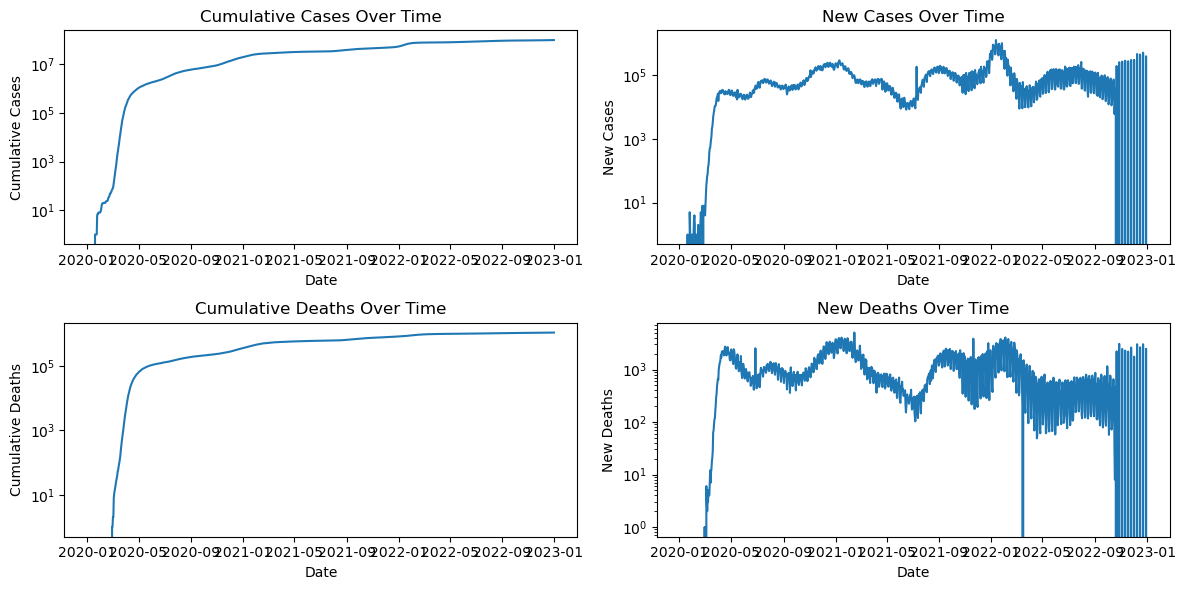

In [130]:
# Create subplots with custom layout
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

# Plot cumulative cases over time
sns.lineplot(x=data.index, y=data['Cumulative_cases'], data=data, ax=axes[0, 0])
axes[0, 0].set_title("Cumulative Cases Over Time")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Cumulative Cases")
axes[0, 0].set_yscale('log')  # Set the y-axis scale to logarithmic

# Plot new cases over time
sns.lineplot(x=data.index, y=data['New_cases'], data=data, ax=axes[0, 1])
axes[0, 1].set_title("New Cases Over Time")
axes[0, 1].set_xlabel("Date")
axes[0, 1].set_ylabel("New Cases")
axes[0, 1].set_yscale('log')  # Set the y-axis scale to logarithmic

# Plot cumulative deaths over time
sns.lineplot(x=data.index, y=data['Cumulative_deaths'], data=data, ax=axes[1, 0])
axes[1, 0].set_title("Cumulative Deaths Over Time")
axes[1, 0].set_xlabel("Date")
axes[1, 0].set_ylabel("Cumulative Deaths")
axes[1, 0].set_yscale('log')  # Set the y-axis scale to logarithmic

# Plot new deaths over time
sns.lineplot(x=data.index, y=data['New_deaths'], data=data, ax=axes[1, 1])
axes[1, 1].set_title("New Deaths Over Time")
axes[1, 1].set_xlabel("Date")
axes[1, 1].set_ylabel("New Deaths")
axes[1, 1].set_yscale('log')  # Set the y-axis scale to logarithmic

# Customize layout
fig.tight_layout()

# Show the plots
plt.show()


In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

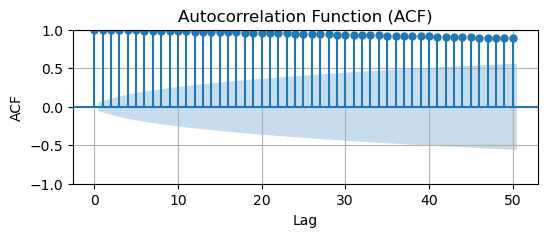

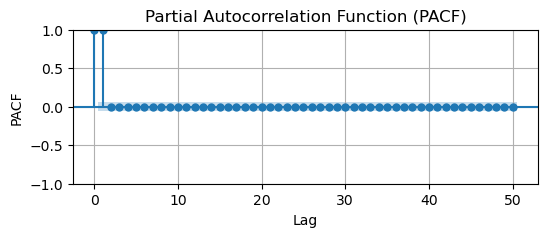

In [131]:
# Plot ACF
fig, ax = plt.subplots(figsize=(6, 2))
plot_acf(data['Cumulative_cases'], lags=50, ax=ax)
ax.set_title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(6, 2))
plot_pacf(data['Cumulative_cases'], lags=50, ax=ax)
ax.set_title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

 Time series analysis


In [18]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression

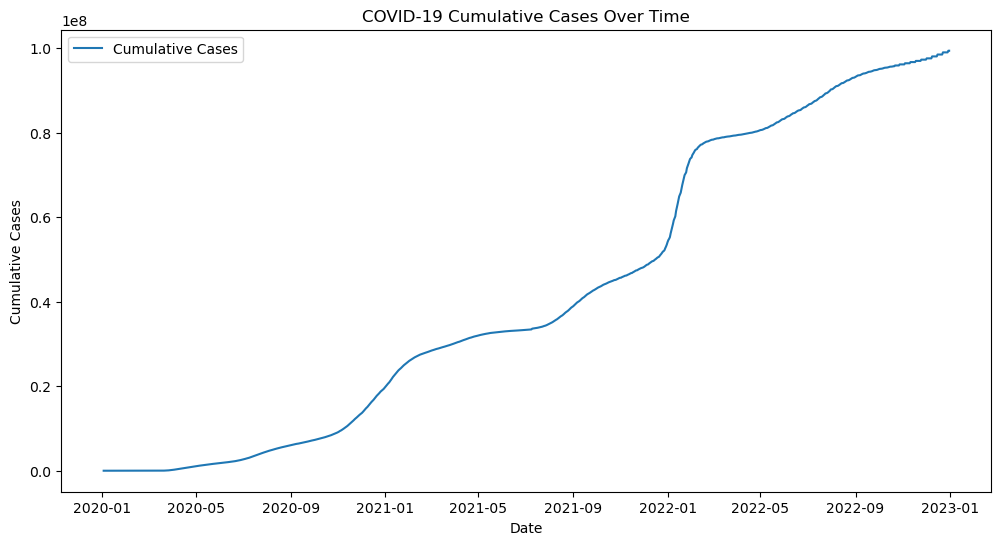

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_cases'], label='Cumulative Cases')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('COVID-19 Cumulative Cases Over Time')
plt.legend(loc='best')
plt.show()

ARIMA works best with stationary data.
Use the Augmented Dickey-Fuller test to check for stationarity.

In [20]:
result = adfuller(data['Cumulative_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: 0.11087357170619862
p-value: 0.9667956897500715
Critical Values: {'1%': -3.4364647646486093, '5%': -2.864239892228526, '10%': -2.5682075189699822}


If the p-value is less than a chosen significance level (e.g., 0.05), we can consider the data stationary
But here data is not stationary so, we try to make it statioanry with differencing

In [21]:
# Perform differencing to make the data stationary
data['Diff_Cumulative_cases'] = data['Cumulative_cases'].diff().fillna(0)
# Re-check stationarity
result = adfuller(data['Diff_Cumulative_cases'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.1387583591525825
p-value: 0.0008351112298065869
Critical Values: {'1%': -3.436459052172655, '5%': -2.864237372528562, '10%': -2.568206176974609}


here as the ADF statisties is negative and p value is less than significance level we can say the data has become stationary after 1 differnece
data is stationary with order 1

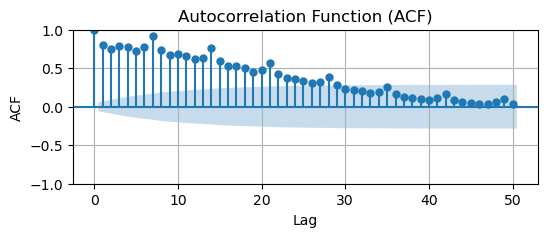

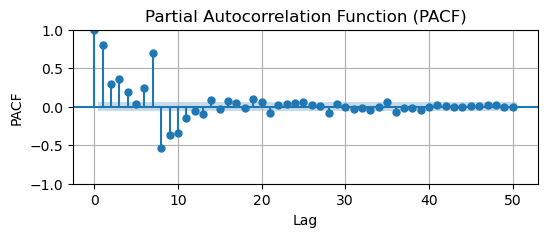

In [136]:
# Plot ACF
fig, ax = plt.subplots(figsize=(6, 2))
plot_acf(data['Diff_Cumulative_cases'], lags=50, ax=ax)  # Adjust lags as needed
ax.set_title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

# Plot PACF
fig, ax = plt.subplots(figsize=(6, 2))
plot_pacf(data['Diff_Cumulative_cases'], lags=50, ax=ax)  # Adjust lags as needed
ax.set_title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

In [22]:

p = 1  # AR
d = 1  # Differencing
q = 1 # MA

# Re-fit the ARIMA model
model = sm.tsa.ARIMA(data['Diff_Cumulative_cases'], order=(p, d, q))
results = model.fit()

C:\Users\BVB\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\BVB\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\BVB\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:     Diff_Cumulative_cases   No. Observations:                 1094
Model:                    ARIMA(1, 1, 1)   Log Likelihood              -13674.984
Date:                   Wed, 17 Apr 2024   AIC                          27355.968
Time:                           00:02:44   BIC                          27370.958
Sample:                       01-03-2020   HQIC                         27361.641
                            - 12-31-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0569      0.018      3.199      0.001       0.022       0.092
ma.L1         -0.7412      0.012    -61.334      0.000      -0.765      -0.717
sigma2      4.612e+09   1.18

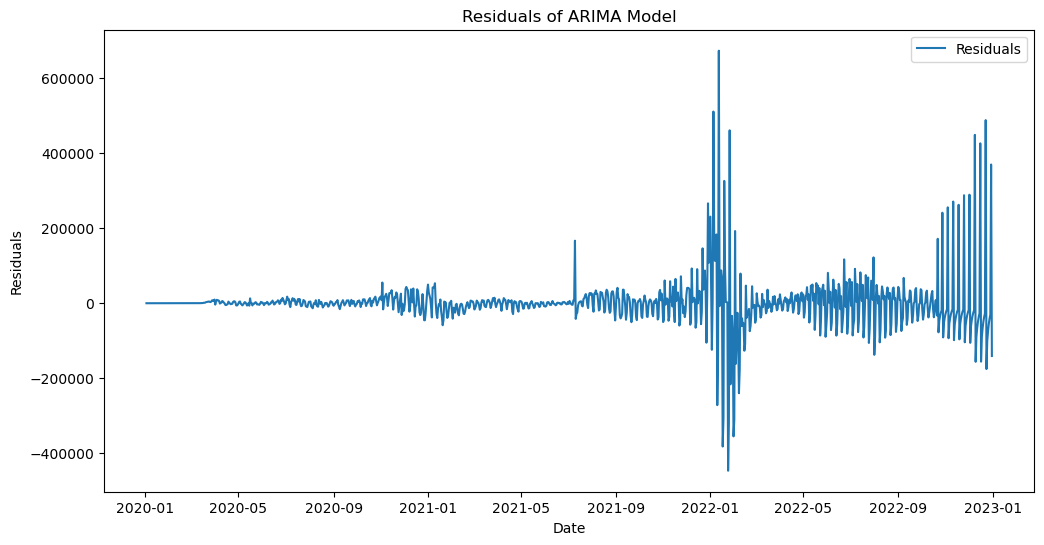

In [23]:
# Print model summary
print(results.summary())

# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(results.resid, label='Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of ARIMA Model')
plt.legend(loc='best')
plt.show()

Forecasting
1.ARIMA


In [24]:
import numpy as np

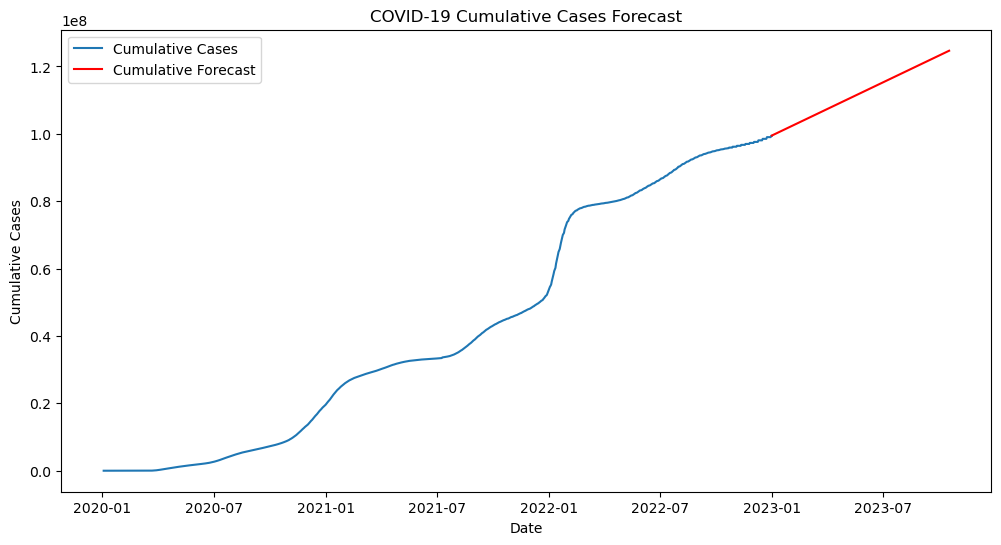

In [25]:

# Forecast for the specified number of steps
forecast_steps = 291  
forecast = results.forecast(steps=forecast_steps)

# Calculate the cumulative forecast
cumulative_forecast = data['Cumulative_cases'].iloc[-1] + np.cumsum(forecast)

# Create a date range for the forecast
date_range = pd.date_range(start=data.index[-1], periods=forecast_steps)

# Plot the original data and the cumulative forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_cases'], label='Cumulative Cases')
plt.plot(date_range, cumulative_forecast, label='Cumulative Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('COVID-19 Cumulative Cases Forecast')
plt.legend(loc='best')
plt.show()



SARIMA


In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [27]:
# Define the SARIMA model order (p, d, q) and seasonal order (P, D, Q, S)
p, d, q = 1, 1, 1 # Autoregressive, differencing, and moving average orders
P, D, Q, S = 1, 1, 1, 7  # Seasonal orders (7 for weekly seasonality)

In [28]:
# Fit the SARIMA model
model = SARIMAX(data['Cumulative_cases'], order=(p, d, q), seasonal_order=(P, D, Q, S))
results = model.fit()

C:\Users\BVB\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\BVB\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\BVB\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [29]:
# Forecast for the specified number of steps
forecast_steps = 291 
forecast = results.get_forecast(steps=forecast_steps)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

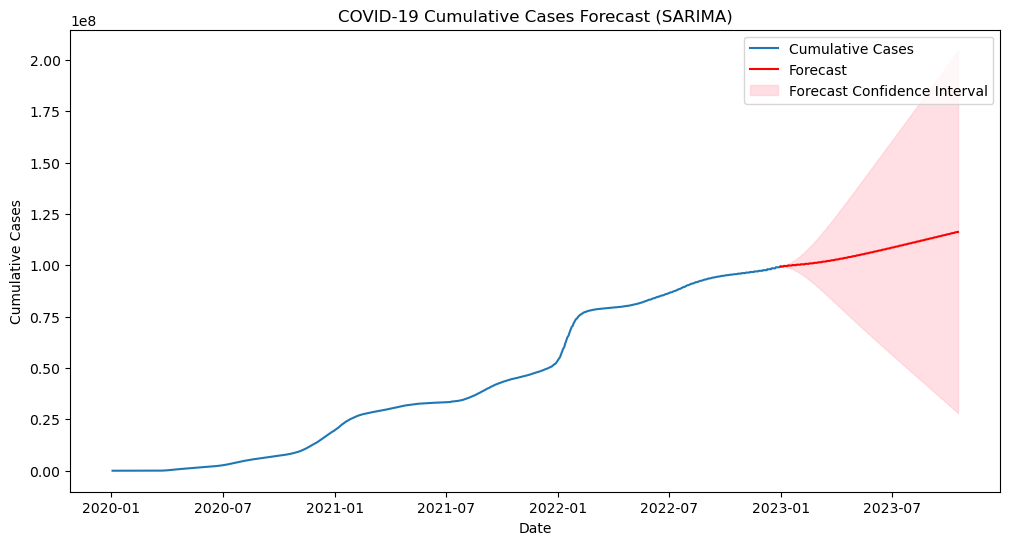

In [30]:
# Create a date range for the forecast
date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1)

# Plot the original data, forecast, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_cases'], label='Cumulative Cases')
plt.plot(date_range[:-1], forecast_values, label='Forecast', color='red')  
plt.fill_between(date_range[:-1], confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='Forecast Confidence Interval')  # Exclude the last element from date_range
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('COVID-19 Cumulative Cases Forecast (SARIMA)')
plt.legend(loc='best')
plt.show()


We can calculate different forecast error metrics, such as
-Mean Absolute Error (MAE)
-Mean Squared Error (MSE)
-Root Mean Squared Error (RMSE)
-Mean Percentage Error

In [31]:
# Loading the 2023 Dataset
actual_data = pd.read_csv("COVID-2023-USA.csv")

In [32]:
# Data Preprocessing
# Display the first few rows of the dataset to inspect its structure
print(actual_data.head())

  Date_reported Country_code                   Country WHO_region  New_cases  \
0    01-01-2023           US  United States of America       AMRO          0   
1    02-01-2023           US  United States of America       AMRO          0   
2    03-01-2023           US  United States of America       AMRO          0   
3    04-01-2023           US  United States of America       AMRO          0   
4    05-01-2023           US  United States of America       AMRO          0   

   Cumulative_cases  New_deaths  Cumulative_deaths  
0          99411696           0            1082456  
1          99411696           0            1082456  
2          99411696           0            1082456  
3          99411696           0            1082456  
4          99411696           0            1082456  


In [33]:
# Check for missing values
missing_values = actual_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64


In [34]:
# Remove duplicates if any
actual_data.drop_duplicates(inplace=True)

In [35]:
actual_data['Date_reported'] = pd.to_datetime(actual_data['Date_reported'], format='%d-%m-%Y')


In [36]:
# Set Date_reported as the index
actual_data.set_index('Date_reported', inplace=True)

In [37]:
# Sort the DataFrame by date in ascending order
actual_data.sort_index(inplace=True)

In [40]:
print("Actual values shape:", actual_values.shape)
print("Forecast values shape:", forecast_values.shape)

Actual values shape: (291,)
Forecast values shape: (291,)


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


actual_values = actual_data['Cumulative_cases'][-len(forecast_values):]

# Calculate forecast errors
forecast_errors = forecast_values - actual_values
percentage_errors = ((forecast_values - actual_values) / actual_values) * 100

# Take the absolute value of percentage errors
absolute_percentage_errors = abs(percentage_errors)

# Calculate error metrics
mae = mean_absolute_error(actual_values, forecast_values)
mse = mean_squared_error(actual_values, forecast_values)
rmse = sqrt(mse)
mpe = absolute_percentage_errors.mean()

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root of Mean Squared Error: {rmse}")
print(f"Mean Percentage Error: {mpe}%")



Mean Absolute Error: 4228419.667873197
Mean Squared Error: 34405785747113.06
Root of Mean Squared Error: 5865644.529556241
Mean Percentage Error: 4.091240683514052%


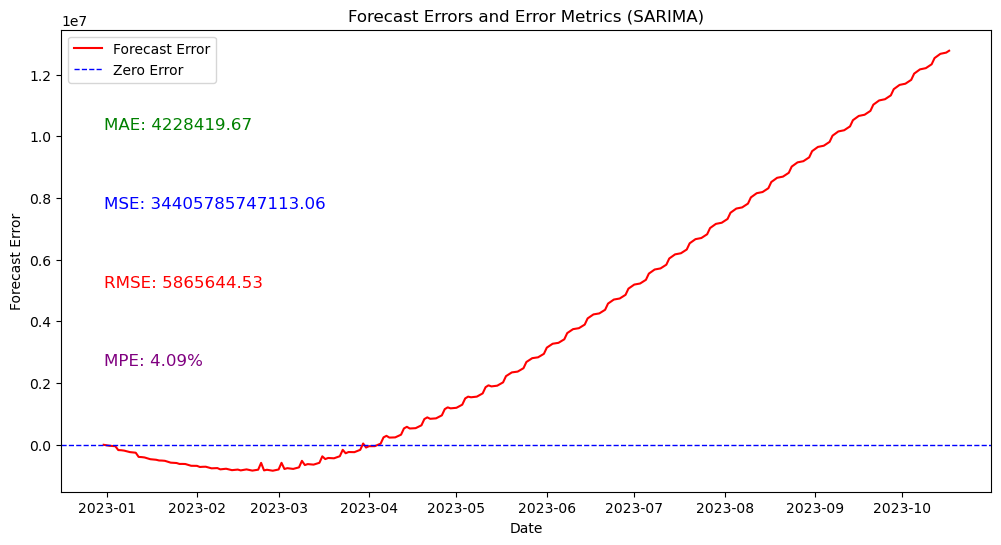

In [41]:
# Create a date range for the forecast errors with the same number of elements as forecast_errors
error_date_range = pd.date_range(start=data.index[-1], periods=len(forecast_errors))

# Plot the forecast errors along with error metrics
plt.figure(figsize=(12, 6))
plt.plot(error_date_range, forecast_errors, label='Forecast Error', color='red')
plt.axhline(0, color='blue', linestyle='--', linewidth=1, label='Zero Error')

# Annotate the error metrics on the plot with adjusted vertical positions
label_offset = max(forecast_errors) / 5
plt.text(error_date_range[0], max(forecast_errors) - label_offset, f'MAE: {mae:.2f}', fontsize=12, color='green')
plt.text(error_date_range[0], max(forecast_errors) - 2 * label_offset, f'MSE: {mse:.2f}', fontsize=12, color='blue')
plt.text(error_date_range[0], max(forecast_errors) - 3 * label_offset, f'RMSE: {rmse:.2f}', fontsize=12, color='red')
plt.text(error_date_range[0], max(forecast_errors) - 4 * label_offset, f'MPE: {mpe:.2f}%', fontsize=12, color='purple')

plt.xlabel('Date')
plt.ylabel('Forecast Error')
plt.title('Forecast Errors and Error Metrics (SARIMA)')
plt.legend(loc='best')
plt.show()



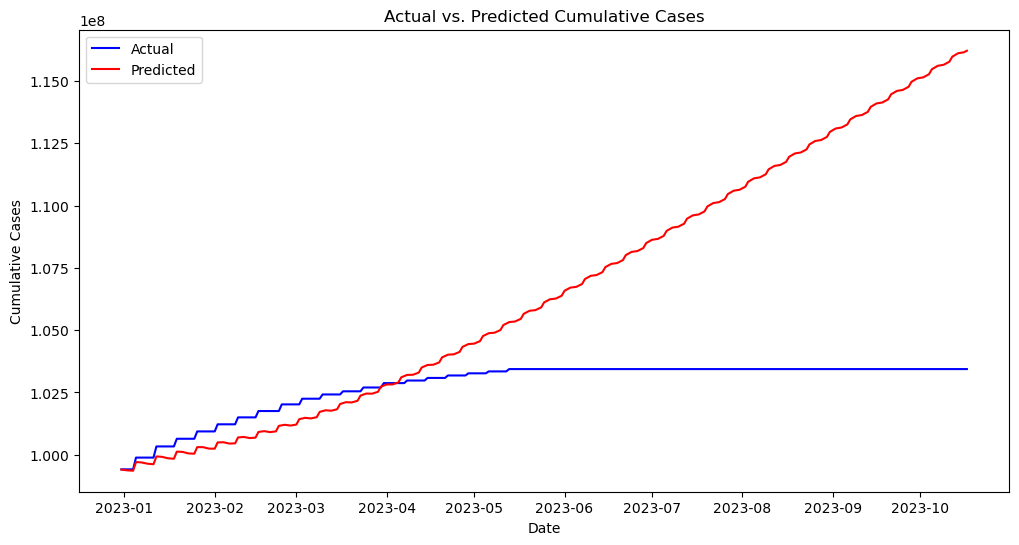

In [42]:

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(error_date_range, actual_values, label='Actual', color='blue')
plt.plot(error_date_range, forecast_values, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Actual vs. Predicted Cumulative Cases')
plt.legend(loc='best')
plt.show()


In [238]:
print("Forecast Values:\n", forecast_values)
print("Actual Values:\n", actual_values)
difference=forecast_values - actual_values
difference=round(difference,2)
print(difference)

Forecast Values:
 2023-01-01    9.940262e+07
2023-01-02    9.938690e+07
2023-01-03    9.937165e+07
2023-01-04    9.936356e+07
2023-01-05    9.935659e+07
                  ...     
2023-10-14    1.160477e+08
2023-10-15    1.161159e+08
2023-10-16    1.161363e+08
2023-10-17    1.161554e+08
2023-10-18    1.162167e+08
Freq: D, Name: predicted_mean, Length: 291, dtype: float64
Actual Values:
 Date_reported
2023-01-01     99411696
2023-01-02     99411696
2023-01-03     99411696
2023-01-04     99411696
2023-01-05     99411696
                ...    
2023-10-14    103436829
2023-10-15    103436829
2023-10-16    103436829
2023-10-17    103436829
2023-10-18    103436829
Name: Cumulative_cases, Length: 291, dtype: int64
2023-01-01       -9072.62
2023-01-02      -24800.65
2023-01-03      -40043.57
2023-01-04      -48138.38
2023-01-05      -55107.44
                 ...     
2023-10-14    12610843.15
2023-10-15    12679089.02
2023-10-16    12699503.42
2023-10-17    12718610.83
2023-10-18    12779829

Machine Learning Models

Train MAE: 5807376.99
Train MSE: 46712183396344.30
Train RMSE: 6834631.18
Test MAE: 13443877.28
Test MSE: 246854707531491.91
Test RMSE: 15711610.60


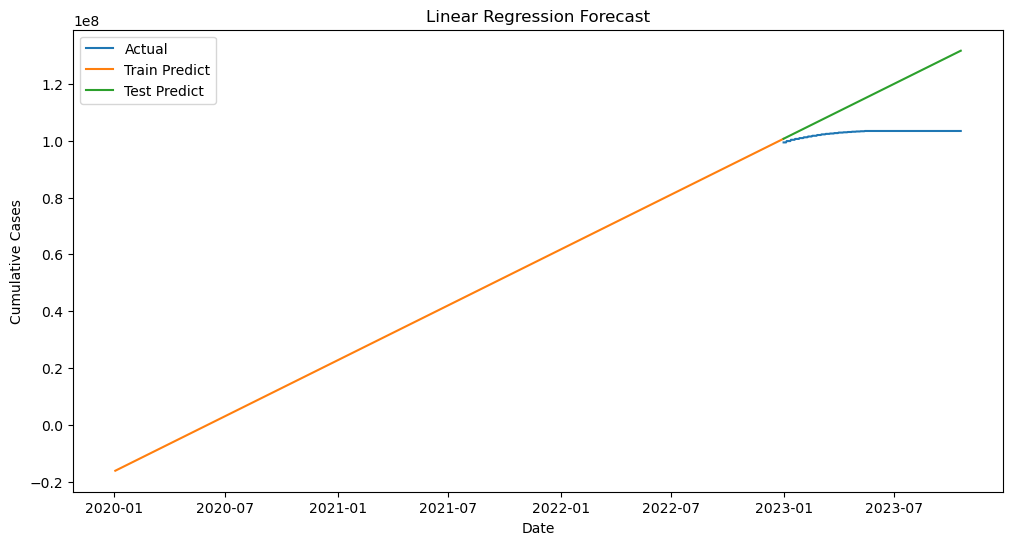

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Convert datetime index to numerical values for training data
X_train = data.index.values.astype(np.int64).reshape(-1, 1)
y_train = data['Cumulative_cases'].values

# Convert datetime index to numerical values for testing data
X_test = actual_data.index.values.astype(np.int64).reshape(-1, 1)
y_test = actual_data['Cumulative_cases'].values

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Evaluate the model
train_mae = mean_absolute_error(y_train, train_predict)
train_mse = mean_squared_error(y_train, train_predict)
train_rmse = sqrt(train_mse)

test_mae = mean_absolute_error(y_test, test_predict)
test_mse = mean_squared_error(y_test, test_predict)
test_rmse = sqrt(test_mse)

print(f"Train MAE: {train_mae:.2f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(actual_data.index, actual_data['Cumulative_cases'], label='Actual')
plt.plot(data.index, train_predict, label='Train Predict')
plt.plot(actual_data.index, test_predict, label='Test Predict')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('Linear Regression Forecast')
plt.legend()
plt.show()


Epoch 1/70
34/34 [==============================] - 3s 6ms/step - loss: 0.0602
Epoch 2/70
34/34 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 3/70
34/34 [==============================] - 0s 4ms/step - loss: 2.5475e-04
Epoch 4/70
34/34 [==============================] - 0s 4ms/step - loss: 1.6172e-04
Epoch 5/70
34/34 [==============================] - 0s 4ms/step - loss: 1.1471e-04
Epoch 6/70
34/34 [==============================] - 0s 4ms/step - loss: 7.6727e-05
Epoch 7/70
34/34 [==============================] - 0s 6ms/step - loss: 5.2017e-05
Epoch 8/70
34/34 [==============================] - 0s 6ms/step - loss: 3.7860e-05
Epoch 9/70
34/34 [==============================] - 0s 5ms/step - loss: 3.2366e-05
Epoch 10/70
34/34 [==============================] - 0s 5ms/step - loss: 2.7771e-05
Epoch 11/70
34/34 [==============================] - 0s 5ms/step - loss: 2.8645e-05
Epoch 12/70
34/34 [==============================] - 0s 4ms/step - loss: 2.7991e-05
Epoch 13/

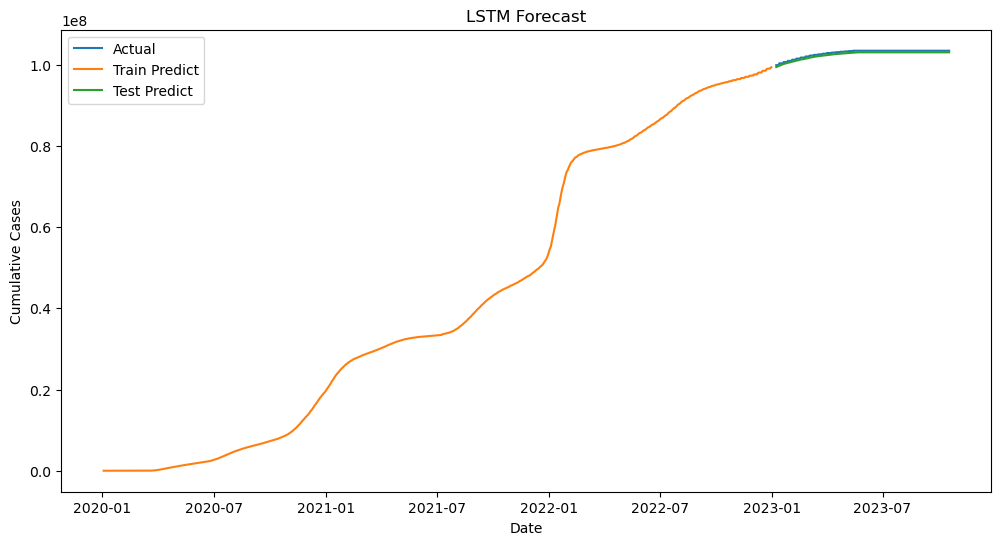

In [59]:

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


# Convert datetime index to numerical values for training data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Cumulative_cases'].values.reshape(-1, 1))

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 7  # Number of previous time steps to use as input
X_train, y_train = create_dataset(scaled_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=70, batch_size=32)

# Prepare test data
scaled_test_data = scaler.transform(actual_data['Cumulative_cases'].values.reshape(-1, 1))
X_test, y_test = create_dataset(scaled_test_data, look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions for each input sequence in the test data
test_predict = []
for i in range(len(X_test)):
    x_input = X_test[i].reshape((1, look_back, 1))
    y_hat = model.predict(x_input, verbose=0)
    test_predict.append(y_hat[0, 0])

# Inverse the scaling for predictions
test_predict = scaler.inverse_transform(np.array(test_predict).reshape(-1, 1))

# Calculate the evaluation metrics
test_mae = mean_absolute_error(actual_data['Cumulative_cases'][look_back:], test_predict)
test_rmse = sqrt(mean_squared_error(actual_data['Cumulative_cases'][look_back:], test_predict))

print(f"Train MAE: {train_mae:.2f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test MAE: {test_mae:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(actual_data.index[look_back:], actual_data['Cumulative_cases'][look_back:], label='Actual')
plt.plot(data.index, train_predict, label='Train Predict')
plt.plot(actual_data.index[look_back:], test_predict, label='Test Predict')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.title('LSTM Forecast')
plt.legend()
plt.show()

